# Using Machine Learning Tools: Workshop 7

The aim of this week's workshop is to use support vector machines (SVMs), compare different kernels and visualise the decision boundaries.

You will use [Wisconsin Breast Cancer data set](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset), which is included in scikit learn (follow the link and read about what the dataset is)

Note: the link on webpage to the dataset is 'dead'. However, you can load the data directly using the below (as used in the below code):

`from sklearn.datasets import load_breast_cancer`

`data = load_breast_cancer()`


# Part 1 [Students, 2 min]: Setup and loading data

Use the cells below to setup the notebook and load in data.

In [9]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# Extract the feature and target
xarray = data.data
yarray = data.target
print(xarray.shape)
print(yarray.shape)
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)
print(fullarray.shape)

(569, 30)
(569,)
(569, 31)


# Part 2.1 [Students, 10 min]: Viewing the data and visualising features

We want to have a look at the data, and get a better understanding of the various features included. It is also a good idea to try and look at the relationship between each feature and the target (what we are trying to predict). Try to come up with some useful visualisation and data inspection steps to get an idea of this.



# Part 2.2 [TA,10 mins]: Discuss additional visualisations

Once students have tried to come up with some additional visualisations, discuss what the came up with. You can show them the below plots and outputs as potential examples, and discuss why these are useful.

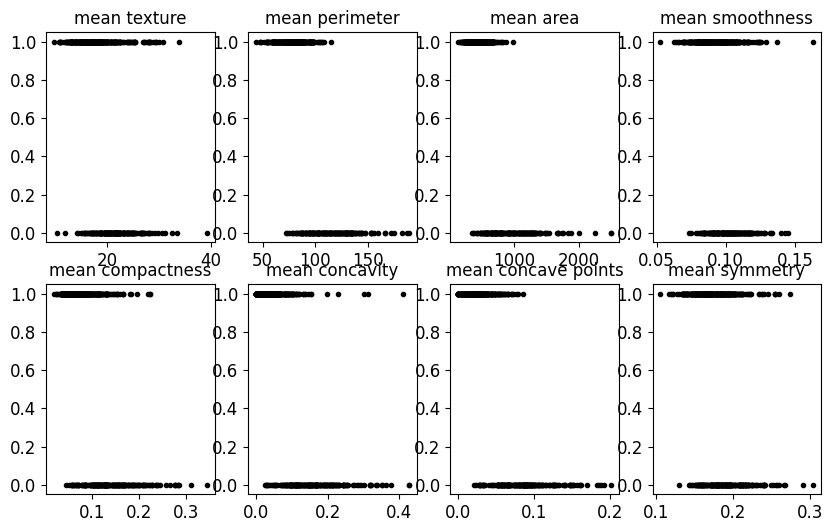

In [4]:
 # Define a proper size of the plot
plt.figure(figsize=(10,6))

# Check the relation between each feature and the target
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.plot(fullarray[:, i], fullarray[:,-1], 'k.')
    plt.title(data.feature_names[i])

In [5]:
# Remember to define properly the positive and negative class
fullarray[:,-1] = 1 - fullarray[:,-1]   # now invert the labels (so that malignant=1)
df = pd.DataFrame(fullarray,columns = list(data.feature_names) + ['target'])

In [6]:
# Check the dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0


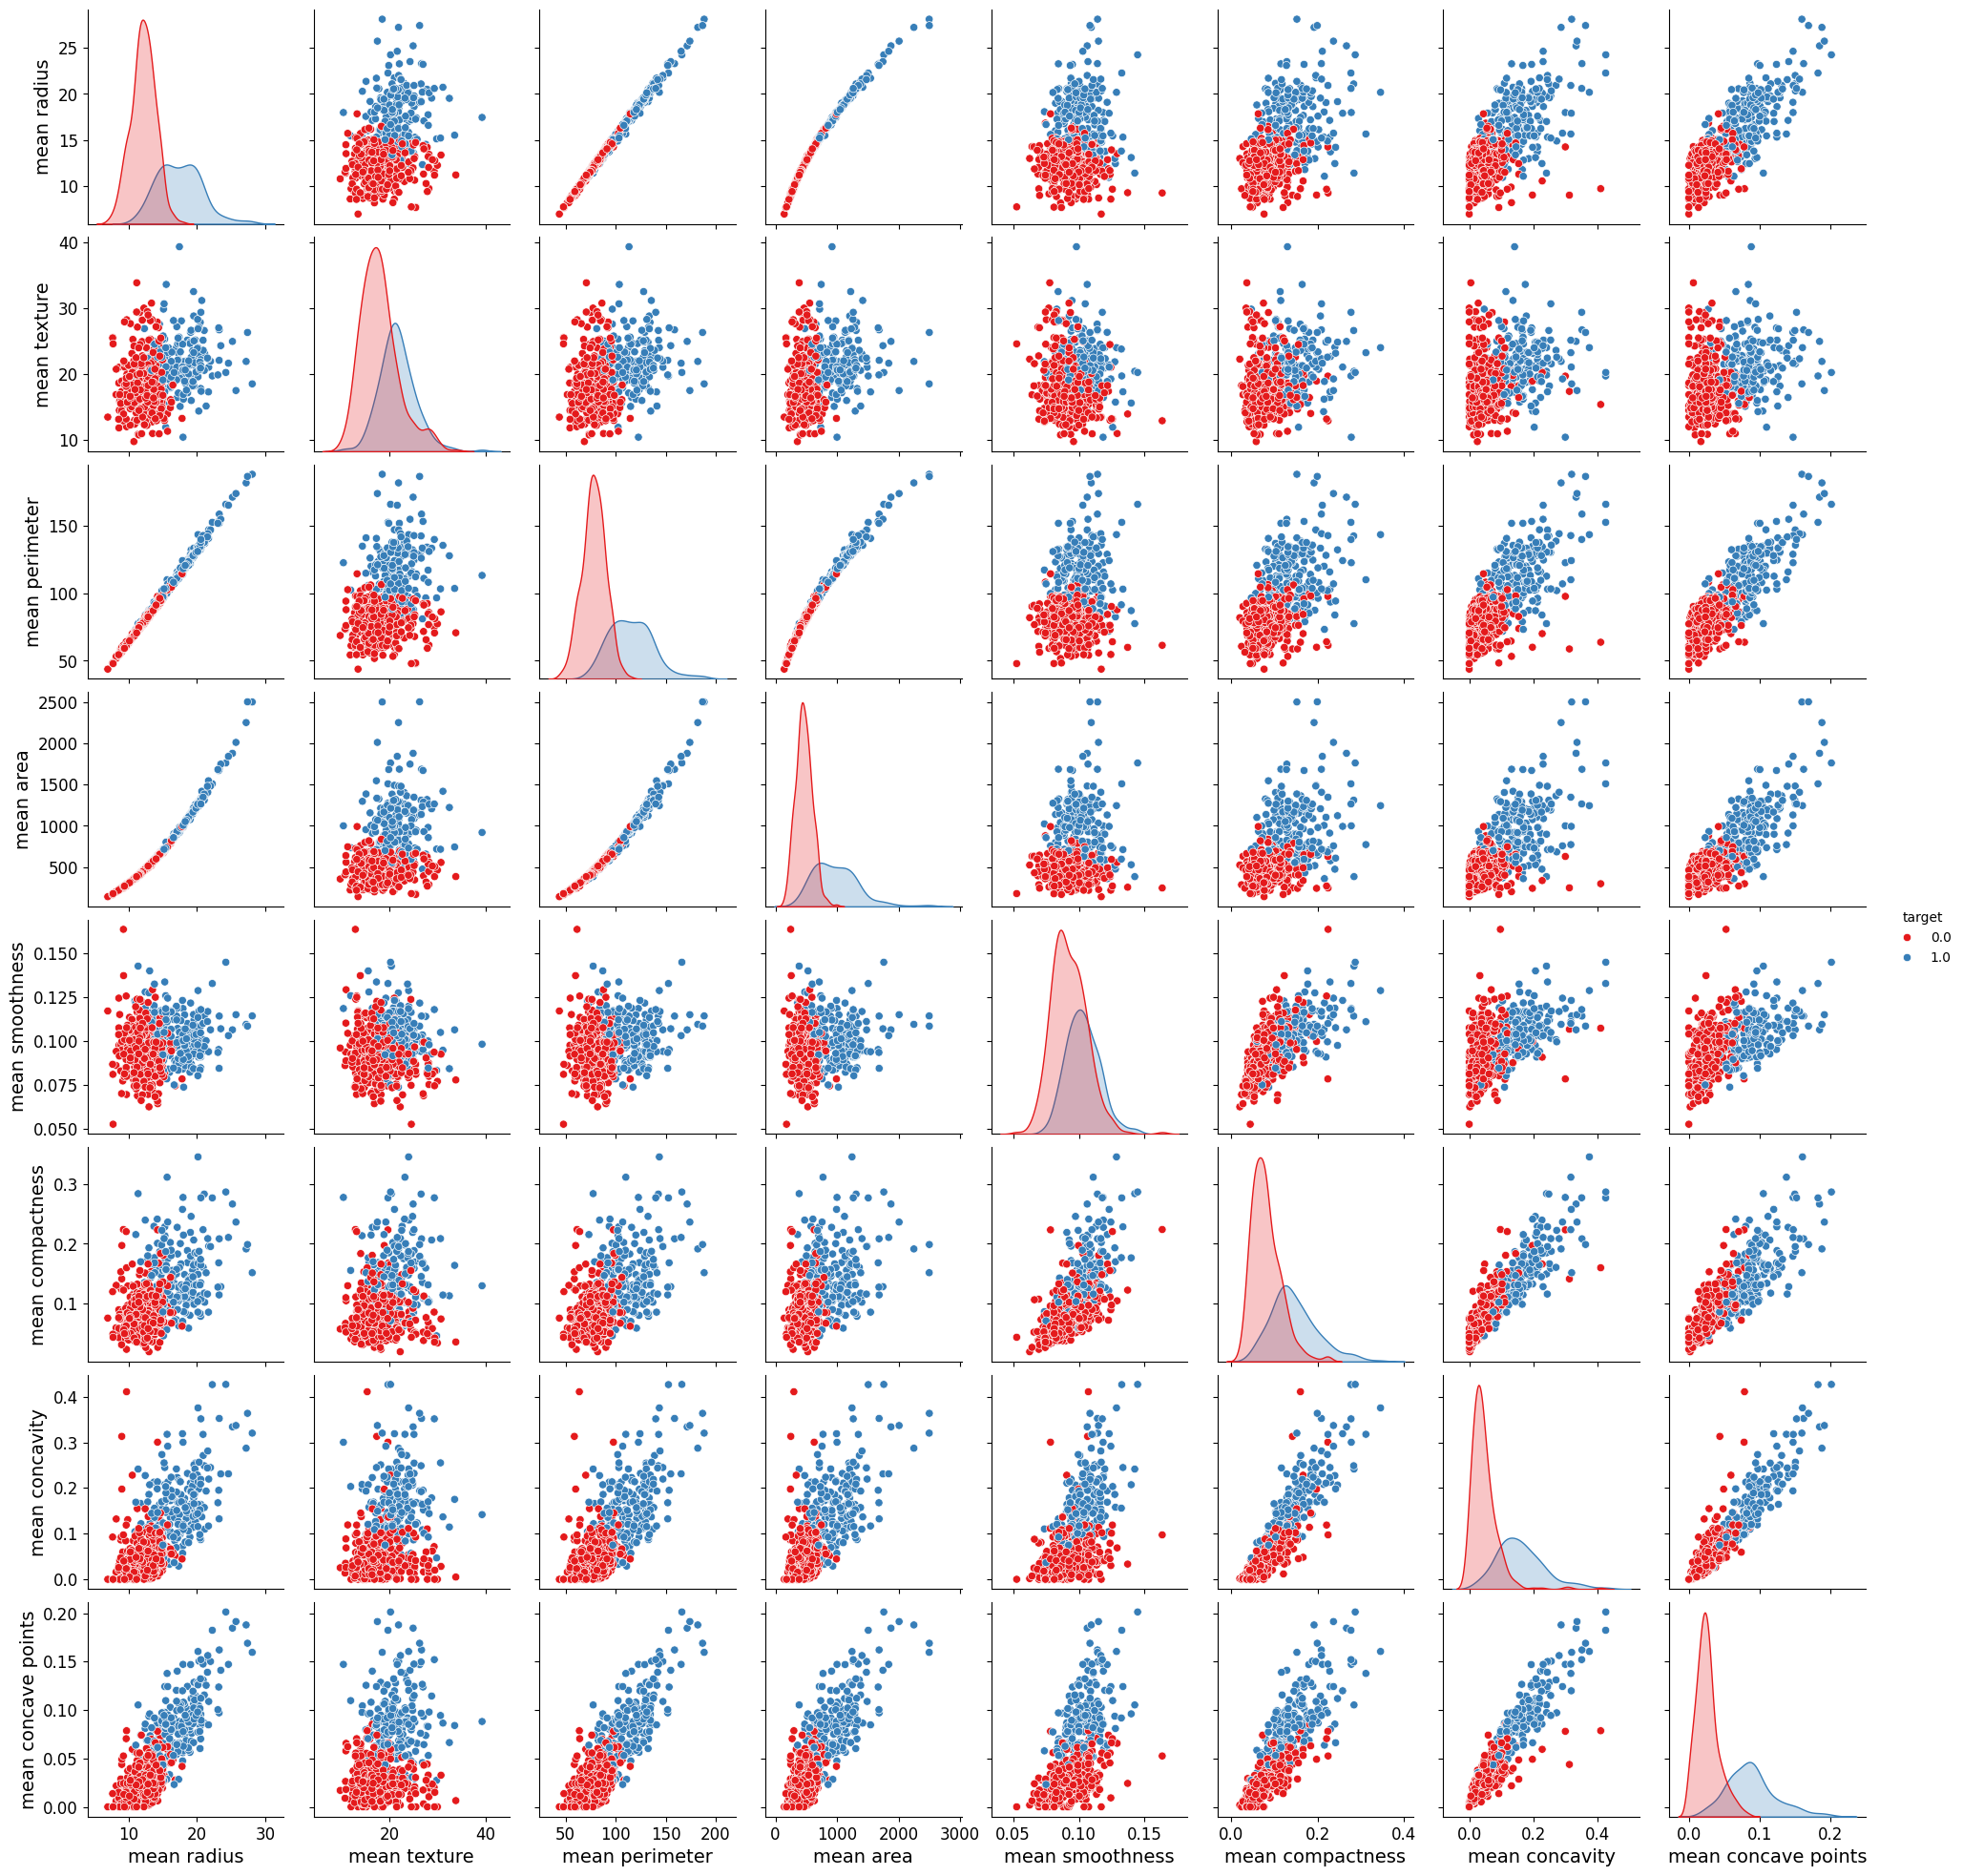

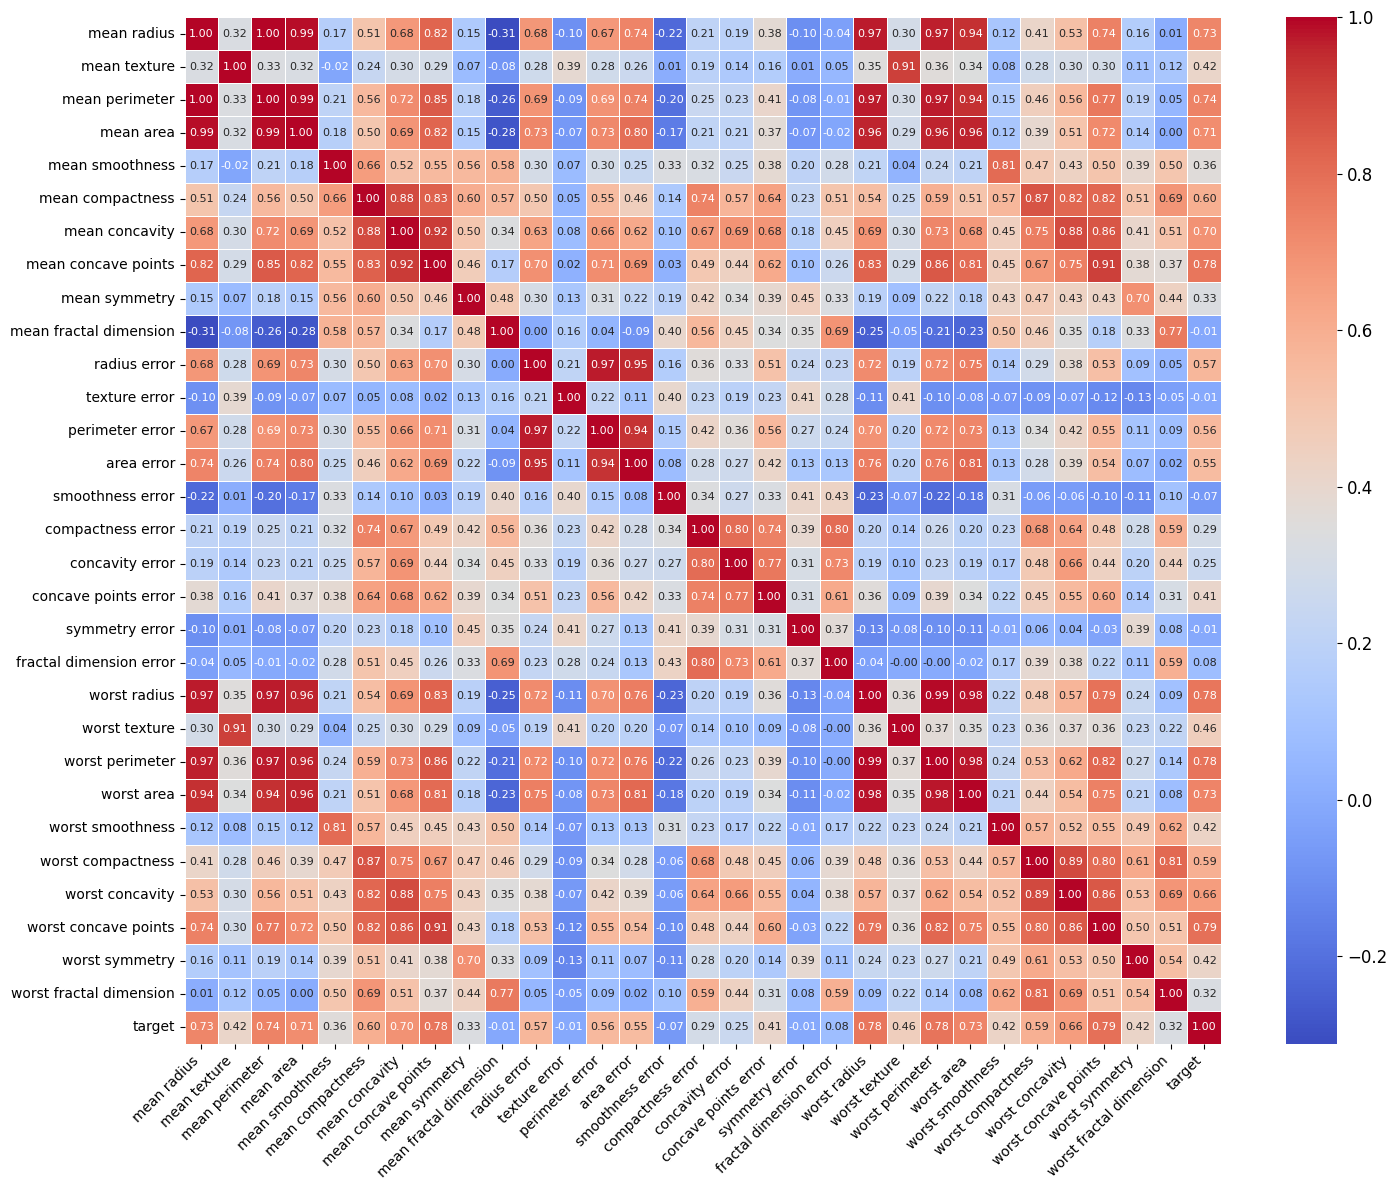

In [12]:
# Pairplot to visualize relationships between features and the target
sn.pairplot(df, vars=data.feature_names[:8], hue='target', palette='Set1', diag_kind='kde')
plt.show()

# Heatmap to visualize the correlation between features
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


# Part 3.1 [Students, 10 min]: Splitting into separate datasets using `stratify`

We next want to split out data into training, testing and validation sets as we have previously done, but want to specifically use `stratify`.

Why use `stratify`?

* Maintaining Class Proportions: When dealing with classification problems, it is crucial to maintain the same proportion of each class in the training, testing, and validation sets as in the original dataset. This ensures that each subset is representative of the overall class distribution, which is especially important if the dataset is imbalanced.
* Improved Model Performance: By keeping the class distribution consistent across all subsets, the model is trained on a dataset that is more reflective of the real-world scenario, which can lead to better generalization and improved performance on unseen data.
* Avoiding Bias: Without stratification, there is a risk that the training set might end up with a disproportionate number of samples from certain classes, which can introduce bias and negatively impact the model’s ability to learn effectively.

Try and write some code to use stratify and ensure each dataset has roughly the same proportions of the classes. You can use ChatGPT to help.

# Part 3.2 [TA, 10 min]: Discuss splitting into separate datasets using `stratify`

Once students have tried to write some code to use `stratify` (needed specifically in Assignment 2), you can show the code below and discuss.

In [14]:
from sklearn.model_selection import train_test_split

# Split in train, validation and test. Check the parameter "stratify"
bigtrain_set, test_set = train_test_split(fullarray, test_size=0.15, random_state=42, stratify=fullarray[:,-1])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.1765, random_state=42, stratify=bigtrain_set[:,-1])

**Note the use of "stratify" in the calls above, as these make sure that each dataset has roughly the same proportions of the classes.**

In [15]:
#Get the X and y for train, val and test
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(397, 30), (397,), (86, 30), (86,), (86, 30), (86,)]


In [16]:
# You can see the proportion of the classes in each partition
print(np.mean(y_train),np.mean(y_test),np.mean(y_val))

0.37279596977329976 0.37209302325581395 0.37209302325581395


These are the proportions of the classes in each dataset (as classes are given values 0 and 1, so a mean is just equal to the proportion of the class represented by 1).

# Part 4.1 [Student, 25 min]: Pipeline and SVM classifier

Build an SVM classifier, in a pipeline, with a linear function (linear) kernel, default (hyper)parameters and determine the accuracy of this classifier on the validation set.

In particular, we want to establish a simple baseline to compare accuracy values, much as we did in the earlier workshop on regression.  Here we will do it for each feature separately, turning the feature values into a simple “prediction probability” by using the formula: y_pred = (x-xmin)/(xmax-xmin) which gives values in the range 0 and 1 (inclusive).

Start with the first feature and write a loop to threshold this prediction (y_pred) at a set of evenly spaced values between 0 and 1, and for each threshold calculate the accuracy. From this determine the maximum accuracy (across all your tested thresholds) for that feature.

Now do this for each feature in turn.  Which feature gives the best accuracy and how does this compare to the SVM result?  What is the name of this feature?

Try to write some code to do this, which you can use ChatGPT's help for.

# Part 4.2 [TA, 10 min]: Disucss pipeline and SVM classifier

The students should be familiar with much of this, but to help, you can go through this example code once they have had some time to try and write their own.


# Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler())])

# SVM Classifier

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

### Build a pipeline


In [19]:
svm_lin = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel='linear'))])

# Train, Predict, Accuracy
svm_lin.fit(X_train, y_train)
y_val_pred = svm_lin.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
print("Accuracy: ", acc)

Accuracy:  0.9651162790697675


# Part 4.3 [Student, 20 min]: ROC and AUC

The value of y_pred can also be used to plot ROC curves and calculate AUC.  Do this for two features: the one that has the highest accuracy and the one that has the lowest accuracy. How do the ROC curves look, and what is the range of AUC values?

# Part 4.4 [TA, 10 min]: Discuss ROC and AUC

Show students the example code and output for the best and worst features in the dataset. Ask them how they would infer which feature is the 'best' and 'worst'.

### AUC/feature

For each feature, we will rescale the features by their max and min values (to get them into range). Then, we will build some ROC curves, considering the values of each feature as `predictions` for the target variable. This is a good way to build a baseline for a binary classification problem.

Some notes:
* The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
** The ROC curve that is the most "bowed" towards the top-left corner indicates the best feature. This is because a curve closer to the top-left corner signifies a higher true positive rate (sensitivity) and a lower false positive rate (1-specificity) at various threshold settings. In other words, the more the curve deviates from the diagonal line (which represents random guessing), the better the feature.
** The ROC curve that is closest to the diagonal line from the bottom-left to the top-right corner indicates the worst feature. This is because the diagonal line represents a model that makes predictions no better than random guessing, with an AUC of 0.5. A feature whose ROC curve stays close to this line is the least informative for classification purposes.


*  AUC (Area Under the Curve) provides a single measure of overall model performance. An AUC of 1.0 represents a perfect model, whereas an AUC of 0.5 indicates a model that performs no better than random chance.
** Note that the worst feature is not the one with the lowest AUC, it is the one with the AUC closest to 0.5, as ones less than this are simply inverted features and could be negated to get positive performance (with AUC>0.5).
** i.e., if a feature has an AUC significantly less than 0.5, it means the model is systematically wrong more often than right, but it still contains information. By inverting the predictions (i.e., flipping the feature), it can be transformed into a useful feature with an AUC greater than 0.5.


In [20]:
# We run over all the features
for n in range(X_train.shape[1]):
    # Pick up one feature
    xfeat = X_train[:,n]
    # Extract the min and max value per feature
    xmin = np.min(xfeat)
    xmax = np.max(xfeat)
    # Calculate 'predictions' transforming each feature in a range of 0 and 1
    y_pred = (xfeat - xmin)/(xmax - xmin)

    # Get the ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    # Get the AUC: Remember. An AUC close to 1 means a better model
    aucval = auc(fpr, tpr)
    # In the case that AUC value is lower than 0.5, we can consider the complement. Why? Try to figure out
    if aucval < 0.5: aucval = 1 - aucval
    # Also, we go to get the accuracy using different thresholds and choose the best case
    best_acc = 0
    best_thr = 0
    for thr in xfeat:
        accuracy_cases = accuracy_score(y_train, y_pred>thr)
        if accuracy_cases > best_acc:
            best_acc = accuracy_cases
            best_thr = thr
    print(f'AUC for feature {n} = {aucval} ; Max accuracy = {best_acc} using the threshold {best_thr}')

AUC for feature 0 = 0.9323238901552154 ; Max accuracy = 0.6272040302267002 using the threshold 23.51
AUC for feature 1 = 0.7769727558884185 ; Max accuracy = 0.6272040302267002 using the threshold 24.27
AUC for feature 2 = 0.94104797568653 ; Max accuracy = 0.6272040302267002 using the threshold 155.1
AUC for feature 3 = 0.9330294149571259 ; Max accuracy = 0.6272040302267002 using the threshold 1747.0
AUC for feature 4 = 0.7260664278736568 ; Max accuracy = 0.4256926952141058 using the threshold 0.1425
AUC for feature 5 = 0.8522196895690872 ; Max accuracy = 0.783375314861461 using the threshold 0.2776
AUC for feature 6 = 0.9225822207749919 ; Max accuracy = 0.8664987405541562 using the threshold 0.2414
AUC for feature 7 = 0.9548057093237816 ; Max accuracy = 0.8589420654911839 using the threshold 0.2012
AUC for feature 8 = 0.6691767068273093 ; Max accuracy = 0.48866498740554154 using the threshold 0.2906
AUC for feature 9 = 0.5486405079778574 ; Max accuracy = 0.3677581863979849 using the th

### ROC Curves

Beautiful, beautiful ROC curves. You should play with the [6, 9] (it is just a list of the ones to display). That way you can see how good each one is at predicting things.

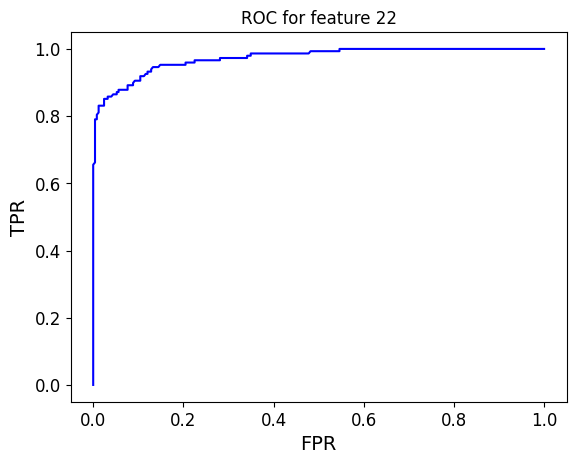

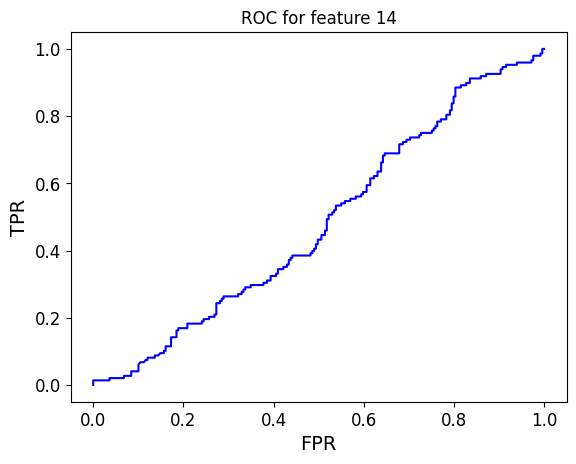

In [21]:
for n in [22, 14]:  # Best and worst feature numbers
    xfeat = X_train[:,n]
    xmin = np.min(xfeat)
    xmax = np.max(xfeat)
    y_pred = (xfeat-xmin)/(xmax-xmin)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
    plt.plot(fpr,tpr,'b')
    plt.title(f'ROC for feature {n}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

# Part 5.1 [Student, 15 min]: Decision Boundaries - Part 1

Choose the two features with the best accuracy scores from the previous steps. Use code (make_meshgrid and plot_contours) to plot the decision boundaries of the SVM classifier from step 2 [note that the code provided here is a modified version of one of the scikit learn examplesLinks to an external site.)].  We will plot these decision boundaries using the original data, so pass in the pipeline to the plot_contours call, not just the classifier part. You will need to choose suitable ranges for make_meshgrid, based on the original feature values.

Now display a scatter plot of the training data points, in different colours for the two classes, on top of the decision boundary. Also add a scatter plot of the validation data points using the same colours but different symbols [ hint: use marker=’s’ to get squares ].

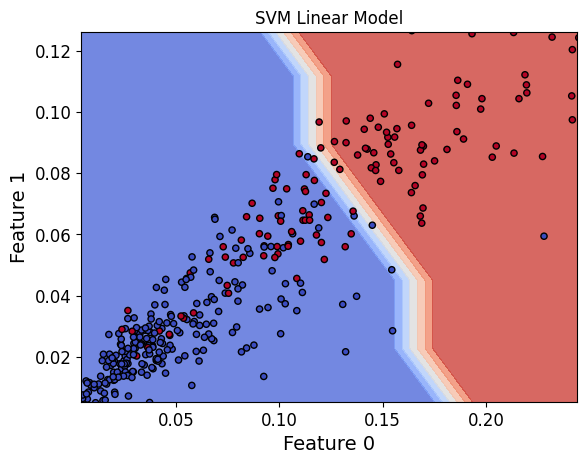

In [22]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# We can pick up two of the best features
feature0 = 6
feature1 = 7

# For each one, extract the percentil 5 and 95. These values are useful to define the limits of our plot
x05, x95 = np.percentile(X_train[:,feature0],[5,95])
y05, y95 = np.percentile(X_train[:,feature1],[5,95])

# Create a new pipeline with SVC and a specific kernel
svm_model = SVC(kernel='linear', C = 1) # C = regularization parameter

# Define two features. We go to use the best two features identified in the previous step
feat1, feat2 = X_train[:, feature0], X_train[:, feature1]

# Train again our model using only the two features
svm_model.fit(X_train[:,[feature0,feature1]],y_train)

# We can plot a DecisionBoundary
disp = DecisionBoundaryDisplay.from_estimator(
    svm_model,                            # Define the model
    train_set[:,[feature0,feature1]],     # Define the data
    response_method="predict",            # Define the method used to create the boundary
    cmap=plt.cm.coolwarm,                 # Color palette
    alpha=0.8,                            # Transparency
    xlabel= "Feature 0",                  # Label 1
    ylabel= "Feature 1")                  # Label 2
# We can plot the data with its true classes
plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

# Define the limit values of the plot
plt.xlim([x05,x95])
plt.ylim([y05,y95])
plt.title("SVM Linear Model")
plt.show()

In [ ]:
# If you have problems running the function DecisionBoundaryDisplay, tries to run the next piece of code in terminal

# pip install -U scikit-learn

# If thi does not work, try first to uninstall sklearn using

# 1) pip uninstall sklear
# 2) pip uninstall scikit-learn
# 3) pip install -U scikit-learn

### Validation
Now let's have another look, this time amend the above code so that we are using the validation set rather than the training set.

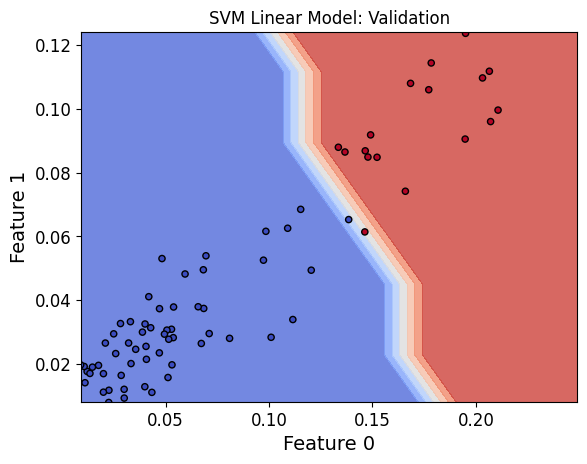

In [23]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])

# Create a new pipeline with SVC and a specific kernel
svm_model = SVC(kernel='linear', C = 1) # C = regularization parameter

# Define two features. We go to use the best two features identified in the previous step
feat1, feat2 = X_train[:, feature0], X_train[:, feature1]
feat1_val, feat2_val = X_val[:, feature0], X_val[:, feature1]

# Train again our model using only the two features
svm_model.fit(X_train[:,[feature0,feature1]],y_train)

# We can plot a DecisionBoundaary
disp = DecisionBoundaryDisplay.from_estimator(
    svm_model,                            # Define the model
    train_set[:,[feature0,feature1]],     # Define the data
    response_method="predict",            # Define the method used to create the boundary
    cmap=plt.cm.coolwarm,                 # Color palette
    alpha=0.8,                            # Transparency
    xlabel= "Feature 0",                  # Label 1
    ylabel= "Feature 1")                  # Label 2
# We can plot the data with its true classes
plt.scatter(feat1_val, feat2_val, c = svm_model.predict(val_set[:,[feature0,feature1]]), cmap=plt.cm.coolwarm, s=20, edgecolors="k")

# Define the limit values of the plot
plt.xlim([x05,x95])
plt.ylim([y05,y95])
plt.title("SVM Linear Model: Validation")
plt.show()

### Fiddling with C Values
C is a regularisation parameter. The higher the C, the bigger the margin (it is ignoring misclassifications).

Try and write some code to explore different values of C, and inspect the plots. What do you notice?

# Part 5.2 [TA, 5 min]: Discuss Decision Boundaries - Part 1

Show students the example code and outputs for various values of C. Point out the changes to the decision boundary defined (width/margin).


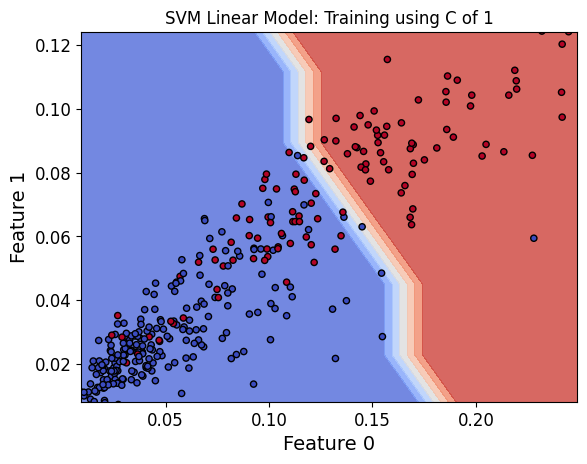

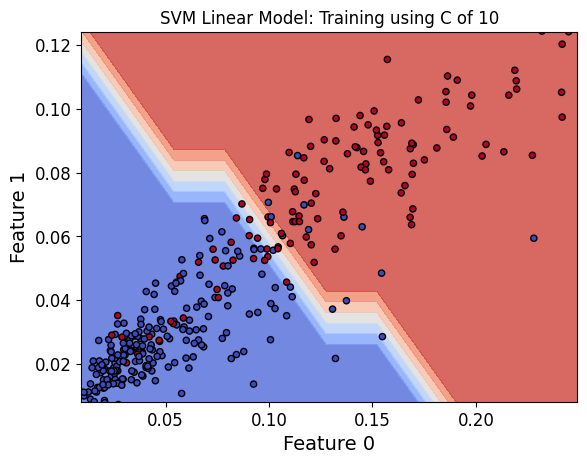

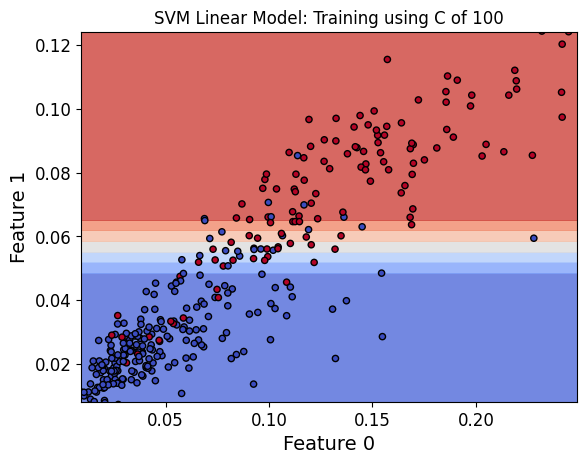

In [24]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])

# We choose different values of C
for c_index, c_choices in enumerate([1, 10, 100]):
    # Create a new pipeline with SVC and a specific kernel
    svm_model = SVC(kernel='linear', C = c_choices) # C = regularization parameter

    # Define two features. We go to use the best two features identified in the previous step
    feat1, feat2 = X_train[:, feature0], X_train[:, feature1]
    feat1_val, feat2_val = X_val[:, feature0], X_val[:, feature1]

    # Train again our model using only the two features
    svm_model.fit(X_train[:,[feature0,feature1]],y_train)

    # We can plot a DecisionBoundaary
    disp = DecisionBoundaryDisplay.from_estimator(
        svm_model,                            # Define the model
        train_set[:,[feature0,feature1]],     # Define the data
        response_method="predict",            # Define the method used to create the boundary
        cmap=plt.cm.coolwarm,                 # Color palette
        alpha=0.8,                            # Transparency
        xlabel= "Feature 0",                  # Label 1
        ylabel= "Feature 1")                  # Label 2
    # We can plot the data with its true classes
    plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    # Define the limit values of the plot
    plt.xlim([x05,x95])
    plt.ylim([y05,y95])
    plt.title(f"SVM Linear Model: Training using C of {c_choices}")
    plt.show()

# Part 5.3 [Student, 15 min]: Decision Boundaries - Part 2

Re-run the SVM classification with polynomial (‘poly’) and radial basis function (‘rbf’) kernels. Compare the results in terms of accuracy and plots of the decision boundaries.

# Part 5.4 [TA, 10 min]: Discuss Decision Boundaries - Part 2

Go through the code and discuss differences in the decision boundary defined, as well as accuracy.

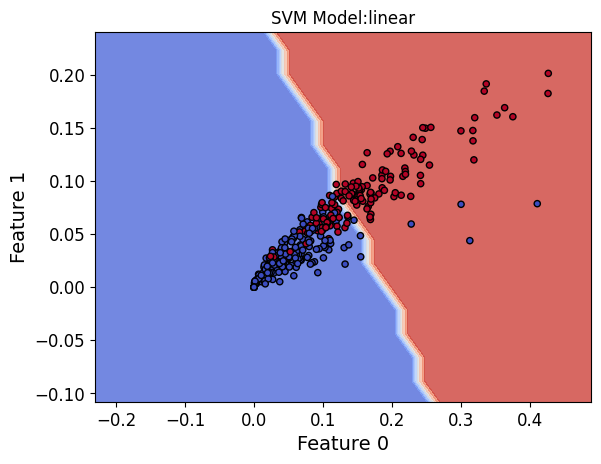

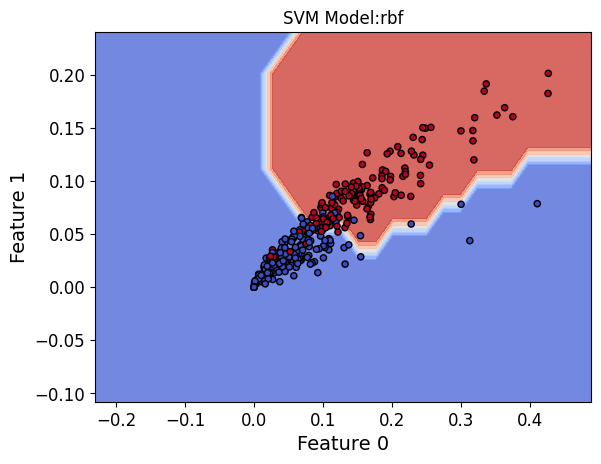

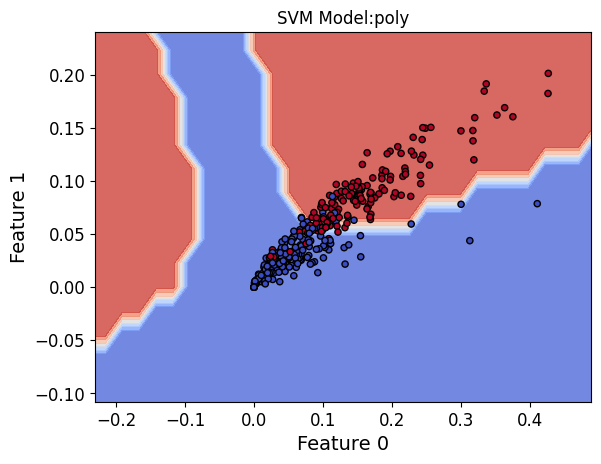

In [25]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])


# Also, we use different kernel types
for kernel_type in ['linear', 'rbf', 'poly']:
    # Create a new pipeline with SVC and a specific kernel
    svm_model = SVC(kernel=kernel_type, C = 1) # C = regularization parameter

    # Define two features. We go to use the best two features identified in the previous step
    feat1, feat2 = X_train[:, feature0], X_train[:, feature1]
    feat1_val, feat2_val = X_val[:, feature0], X_val[:, feature1]

    # Train again our model using only the two features
    svm_model.fit(X_train[:,[feature0,feature1]],y_train)

    # We can plot a DecisionBoundaary
    disp = DecisionBoundaryDisplay.from_estimator(
        svm_model,                            # Define the model
        train_set[:,[feature0,feature1]],     # Define the data
        response_method="predict",            # Define the method used to create the boundary
        cmap=plt.cm.coolwarm,                 # Color palette
        alpha=0.8,                            # Transparency
        xlabel= "Feature 0",                  # Label 1
        ylabel= "Feature 1")                  # Label 2
    # We can plot the data with its true classes
    plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    # Define the limit values of the plot
    plt.xlim([2 * x05 - x95, 2 * x95 - x05])
    plt.ylim([2 * y05 - y95, 2 * y95 - y05])
    plt.title("SVM Model:" + kernel_type)
    plt.show()

### Let's play some more


In [ ]:
feature0 = 6
feature1 = 7

x05, x95 = np.percentile(X_val[:,feature0],[5,95])
y05, y95 = np.percentile(X_val[:,feature1],[5,95])

# Choose different kernel and C
for kernel_type in ['linear', 'rbf', 'poly']:
    for c_choice in [1, 10, 100]:
        # Create a new pipeline with SVC and a specific kernel
        svm_model = SVC(kernel=kernel_type, C = c_choice) # C = regularization parameter

        # Define two features. We go to use the best two features identified in the previous step
        feat1, feat2 = X_train[:, feature0], X_train[:, feature1]
        feat1_val, feat2_val = X_val[:, feature0], X_val[:, feature1]

        # Train again our model using only the two features
        svm_model.fit(X_train[:,[feature0,feature1]],y_train)

        # We can plot a DecisionBoundaary
        disp = DecisionBoundaryDisplay.from_estimator(
            svm_model,                            # Define the model
            train_set[:,[feature0,feature1]],     # Define the data
            response_method="predict",            # Define the method used to create the boundary
            cmap=plt.cm.coolwarm,                 # Color palette
            alpha=0.8,                            # Transparency
            xlabel= "Feature 0",                  # Label 1
            ylabel= "Feature 1")                  # Label 2
        # We can plot the data with its true classes
        plt.scatter(feat1, feat2, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

        # Define the limit values of the plot
        plt.xlim([2 * x05 - x95, 2 * x95 - x05])
        plt.ylim([2 * y05 - y95, 2 * y95 - y05])
        plt.title("SVM Model:" + kernel_type + ", C:" + str(c_choice))
        plt.show()

# Extension: Model selection

As an extension, you can choose the best classifier and report the results on the test set.  Check to see how different it is from the validation set result. Below are is some example code that the students will not initially have.


In [26]:
# Recalculating the above results as they were not stored there, but if they were, this could be avoided
for kerneltype in ['rbf','linear','poly']:
    for c_choice in [1, 10, 100]:
        svm_pl = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel=kerneltype, C=c_choice))])
        svm_pl.fit(X_train,y_train)
        y_val_pred = svm_pl.predict(X_val)
        acc = accuracy_score(y_val,y_val_pred)
        print(f'Validation accuracy = {acc} for kernel {kerneltype} and C={c_choice}')

Validation accuracy = 0.9767441860465116 for kernel rbf and C=1
Validation accuracy = 0.9883720930232558 for kernel rbf and C=10
Validation accuracy = 0.9883720930232558 for kernel rbf and C=100
Validation accuracy = 0.9651162790697675 for kernel linear and C=1
Validation accuracy = 0.9534883720930233 for kernel linear and C=10
Validation accuracy = 0.9302325581395349 for kernel linear and C=100
Validation accuracy = 0.8953488372093024 for kernel poly and C=1
Validation accuracy = 0.9651162790697675 for kernel poly and C=10
Validation accuracy = 0.9651162790697675 for kernel poly and C=100


### Choose RBF as best classifier as it has the best performance on the _validation_ set

In [27]:
kerneltype = 'rbf'
cvalue = 10
svm_pl = Pipeline([('preproc',preproc_pl), ('svc',SVC(kernel=kerneltype, C=cvalue))])
# Refit on combined training + validation set
svm_pl.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((y_train,y_val),axis=0))
# Evaluate this model (and only the selected best model) on the test set
y_test_pred = svm_pl.predict(X_test)
acc = accuracy_score(y_test,y_test_pred)
print(f'Final test accuracy = {acc} for selected model: kernel={kerneltype}')

Final test accuracy = 0.9883720930232558 for selected model: kernel=rbf
